Link to Excel file of extracted features: https://drive.google.com/drive/u/1/folders/1ZMbW7HxNkBUAlnT-_lXLD4J_r0A778SJ

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


In [2]:
# read in features csv file
df = pd.read_csv('chi_features.csv')
df

,Total Power,Abs LFP,Abs HFP,nLFP,nHFP,LF/HF,RMSSD,SDNN,label
0,11961.755298,3249.551607,8043.922163,0.271662,0.672470,0.403976,932.714731,54.825976,chi_pre
1,9211.352702,2022.717898,6829.397915,0.219590,0.741411,0.296178,803.437128,120.850089,chi_pre
2,9283.913716,2378.753676,6678.590063,0.256223,0.719372,0.356176,793.228617,162.223603,chi_pre
3,9994.154159,2431.402950,7008.622545,0.243283,0.701272,0.346916,865.589904,67.238339,chi_pre
4,9597.894148,1897.800009,7150.309660,0.197731,0.744987,0.265415,852.451001,70.600140,chi_pre
...,...,...,...,...,...,...,...,...,...
187,8823.271892,1693.857757,6516.909783,0.191976,0.738605,0.259917,594.503335,38.441520,chi_med
188,9494.324861,1613.491859,7337.618074,0.169943,0.772843,0.219893,600.640777,42.758414,chi_med
189,9549.818026,1733.558801,7194.855491,0.181528,0.753402,0.240944,594.669282,32.358061,chi_med
190,8598.797016,1663.587060,6455.282349,0.193467,0.750719,0.257709,582.797211,46.469461,chi_med


<AxesSubplot:>

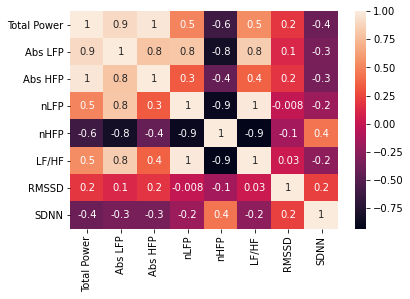

In [3]:
# df.corr()
sns.heatmap(df.corr(), annot = True, fmt='.1g')

In [4]:
# target variables
Y = df['label'].values
# features
X = df.drop(labels = ['label'], axis = 1)

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [5]:
arr = ["{}{}".format("PC", i) for i in np.arange(np.shape(df)[1]-1)+ 1]
(np.shape(df)[1]-1)+ 1
arr

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(X_pca, columns=arr)
dfp = pd.merge(df, pca_df, right_index=True, left_index=True)
print('Explained Variance Ratio')
for i in range(len(arr)):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]))

Explained Variance Ratio
PC1: 0.5990151686650519
PC2: 0.16627763650514654
PC3: 0.14798264451772736
PC4: 0.0789740098476952
PC5: 0.006607248653988833
PC6: 0.001045145850693357
PC7: 8.688104743603047e-05
PC8: 1.1264912260811789e-05


In [7]:
pca = PCA(.99)
X_pca = pca.fit_transform(X)
print('Explained Variance Ratio')
for i in range(len(arr)):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]))

Explained Variance Ratio
PC1: 0.5990151686650519
PC2: 0.16627763650514654
PC3: 0.14798264451772736
PC4: 0.0789740098476952


IndexError: index 4 is out of bounds for axis 0 with size 4

In [8]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1','PC2','PC3','PC4'])
principalDf

,PC1,PC2,PC3,PC4
0,4.127092,1.017250,1.710357,-1.310324
1,-1.047665,0.968566,1.815919,0.754062
2,0.202165,2.289469,3.323522,1.881058
3,1.298339,1.338633,1.269045,-1.095397
4,-1.148704,-0.171344,0.576492,-0.821199
...,...,...,...,...
187,-1.622496,1.410235,-2.179585,-0.396197
188,-2.449131,-0.095308,-2.510813,0.199345
189,-1.689727,0.454423,-2.617688,-0.181970
190,-1.959745,1.467207,-2.073600,-0.028477


In [9]:
finalDf = pd.concat([principalDf, df['label']], axis = 1)
finalDf

,PC1,PC2,PC3,PC4,label
0,4.127092,1.017250,1.710357,-1.310324,chi_pre
1,-1.047665,0.968566,1.815919,0.754062,chi_pre
2,0.202165,2.289469,3.323522,1.881058,chi_pre
3,1.298339,1.338633,1.269045,-1.095397,chi_pre
4,-1.148704,-0.171344,0.576492,-0.821199,chi_pre
...,...,...,...,...,...
187,-1.622496,1.410235,-2.179585,-0.396197,chi_med
188,-2.449131,-0.095308,-2.510813,0.199345,chi_med
189,-1.689727,0.454423,-2.617688,-0.181970,chi_med
190,-1.959745,1.467207,-2.073600,-0.028477,chi_med


In [10]:
# save to a csv file
finalDf.to_csv('chi_pca_features.csv',index=False)